## Step 1: Data Analysis

This part we can generate some graphs or plots to show the distribution of dataset

## Step 2: Preprocess Data

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# nltk.download('punkt_tab')
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [3]:

def clean_data(folder='data',files = ['Automotive_5.json','CDs_and_Vinyl_5.json','Cell_Phones_and_Accessories_5.json','Grocery_and_Gourmet_Food_5.json','Toys_and_Games_5.json']):
    
    review_files = {}
    
    for file_name in files:
        name = file_name.split('_')[0]
        row  = pd.read_json(folder+'/'+file_name,lines=True)
        # Delete all columns except 'Ooverall', 'reviewText', 'summary'
        row = row.drop(columns=['verified','reviewTime','reviewerID','asin','reviewerName','unixReviewTime','vote','image','style'])
        print(f"For category {name}")
        print(row.isnull().sum())
        print(f"Dataset before dropping: {len(row)}")
        # Delet all null rows
        row = row.dropna()
        print(f"Dataset after dropping: {len(row)}")
        row['reviewText'] = row['reviewText']
        review_files[name] = row
    
    return review_files

In [4]:
df_collect = clean_data()

For category Automotive
overall         0
reviewText    866
summary       342
dtype: int64
Dataset before dropping: 1711519
Dataset after dropping: 1710350
For category CDs
reviewText    280
overall         0
summary       227
dtype: int64
Dataset before dropping: 1443755
Dataset after dropping: 1443288
For category Cell
overall         0
reviewText    765
summary       517
dtype: int64
Dataset before dropping: 1128437
Dataset after dropping: 1127206
For category Grocery
overall         0
reviewText    390
summary       219
dtype: int64
Dataset before dropping: 1143860
Dataset after dropping: 1143292
For category Toys
overall          0
reviewText    1175
summary        372
dtype: int64
Dataset before dropping: 1828971
Dataset after dropping: 1827456


In [ ]:
""""
def read_file(filepath):
    seg_docs = {}
    
    with open(filepath, 'r') as file:
        file_dict = json.load(file)
    
    seg_docs = {}
    
    for key, text in file_dict.items():
        
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        words = word_tokenize(text)
        words_list = []
        for word in words:
            if word not in stop_words:
                words_list.append(word)
        
        seg_docs[key] = words_list
    
    return seg_docs
    """

In [ ]:
"""
def strip_clean(reviews_dict):
    
    def process_entry(sentence):
        sentence = sentence.lower()
        sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)
        words_list = []
        for word in sentence:
            if word not in stop_words():
                words_list.append(word)
        return words_list
    
    stripped_dict = {}
    
    for key,df in reviews_dict.items():
        df['reviewText'] = df['reviewText'].apply(process_entry)
        df['summary'] = df['summary'].apply(process_entry)
        stripped_dict[key] = df
    
    return stripped_dict
    """

In [ ]:
# df_reduced_list = strip_clean(df_collect)

In [5]:
print(df_collect.keys())

dict_keys(['Automotive', 'CDs', 'Cell', 'Grocery', 'Toys'])


In [ ]:
df_reduced_list['Automotive']

,overall,reviewText,summary
0,4,"after i wrote the below review, the manufactur...",works well if you place phone in horizontally ...
1,1,it sucks barely picks up anything definitely n...,sucks
2,1,"well to write a short one, it blew 2 fuses of ...",defective
3,3,i have absolutely no memory of buying this but...,looks cool! probably works
4,5,it ok it does it job,five stars
...,...,...,...
1711514,5,"fast shipping, works great!",works great!
1711515,4,"fit isn't great, relays are very hard to press...",four stars
1711516,5,i bought an auxiliary horn for my car and it n...,i bought an auxiliary horn for my car and it ...
1711517,5,way better than stock. nice bright and white. ...,"nice, bright and white"


In [ ]:
# Do we need to set stopwords or lowercase here?
def preprocess_text(text):
    stop_words = set(stop_words('english'))
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    tokens = text.split()
    

In [6]:
def create_category_dataframes(df_collect):
    # For each category, create a dataframe
    for category, data in df_collect.items():
       globals()[f"df_{category}"] = pd.DataFrame(data)


In [7]:
# For each category, create a dataframe
create_category_dataframes(df_collect)

df_CDs.head()

,reviewText,overall,summary
0,Love it!! Great seller!,5,Five Stars
1,One of my very favourite albums from one of my...,5,One of my very favourite albums from one of my...
2,"THank you Jesus Lord God, that brother Green's...",5,Five Stars
3,I recall loving his other albums and maybe thi...,5,forgot but I figured on some of these artists ...
4,Keith Green was a pioneer in the field of Chri...,5,and I have loved every album he did


After preprocessing, we need some statistical analysis for data 

overall
5    968360
4    274693
3    110391
2     46358
1     43486
Name: count, dtype: int64


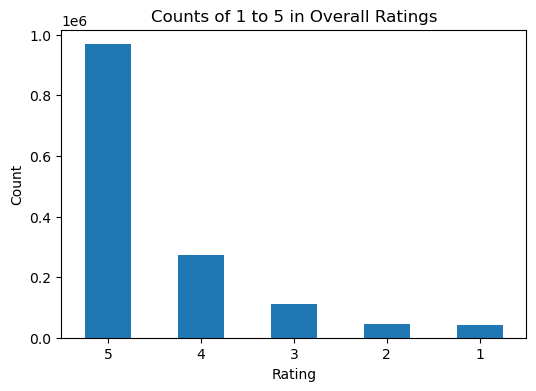

In [21]:
counts = df_CDs['overall'].value_counts()
print(counts)

plt.figure(figsize=(6, 4))
counts.plot(kind='bar')
plt.title('Counts of 1 to 5 in Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Step 3: Vectorization

In [11]:
def transform_text_into_tfidf_vector(df, summary = False):
    X = None
    y = None
    vectorizer = None

    # Identify y
    y = df['overall'].values

    # Select column for vectorization
    if summary:
        text_column = 'summary'
    else:
        text_column = 'reviewText'

    texts = df[text_column]

    # Set parameter for vectorizer
    vectorizer = TfidfVectorizer(max_features=10000, stop_words = 'english')

    X = vectorizer.fit_transform(texts)

    return X, y, vectorizer

In [13]:
# Take CD category as an example
X_CDs, y_CDs, vectorizer = transform_text_into_tfidf_vector(df_CDs, summary = False)
print(X_CDs)

  (0, 5379)	0.3465869513476443
  (0, 4016)	0.2917767413134023
  (0, 7888)	0.8914840539146383
  (1, 3430)	0.5833081557555778
  (1, 430)	0.1505879479717377
  (1, 8123)	0.24838376170127396
  (1, 4150)	0.23057327664186195
  (1, 7363)	0.33771970481217106
  (1, 6226)	0.18254048705285422
  (1, 9908)	0.34715233438322407
  (1, 1480)	0.4203730621270011
  (1, 9957)	0.15964743849167642
  (1, 389)	0.22830932678676846
  (2, 8991)	0.3224535425386348
  (2, 4841)	0.39639286430299425
  (2, 5351)	0.4042489313847334
  (2, 3937)	0.30791493000555037
  (2, 1275)	0.38032973453896507
  (2, 4025)	0.373770311992832
  (2, 5954)	0.14144795336897448
  (2, 8338)	0.2967377746365364
  (2, 4351)	0.2970720853222618
  (3, 430)	0.22111395275888115
  (3, 5954)	0.0802114369141391
  (3, 7178)	0.4825528841196097
  :	:
  (1443283, 1147)	0.20217417439912813
  (1443283, 2331)	0.22973900766031322
  (1443284, 6222)	1.0
  (1443285, 5379)	0.25687859544167635
  (1443285, 4016)	0.43251022117076926
  (1443285, 5954)	0.4450384094192425


In [14]:
# Split train and test set
def training_testing_split(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

    return (X_train, X_test, y_train, y_test)

In [ ]:
X_train_CDs, X_test_CDs, y_train_CDs, y_test_CDs = training_testing_split(X_CDs, y_CDs, test_size = 0.8)

## Step 4: Models Training

In [24]:
classifier1 = RandomForestClassifier(class_weight='balanced')

classifier1.fit(X_train_CDs, y_train_CDs)
y_pred_CDs = classifier1.predict(X_test_CDs)

accuracy1 = accuracy_score(y_test_CDs, y_pred_CDs)

In [25]:
accuracy1

0.6781188102519333